In [17]:

import numpy as np 
import pandas as pd


df = pd.read_csv('/kaggle/input/car-sales-report/Car Sales.xlsx - car_data.csv')
df.sample(10).T

,7333,22227,19457,9744,10132,2418,2674,9824,18155,10229
Car_id,C_CND_007334,C_CND_022228,C_CND_019458,C_CND_009745,C_CND_010133,C_CND_002419,C_CND_002675,C_CND_009825,C_CND_018156,C_CND_010230
Date,10/31/2022,12/3/2023,10/13/2023,12/12/2022,12/20/2022,5/12/2022,5/26/2022,12/13/2022,9/11/2023,12/22/2022
Customer Name,Malia,Maximilian,Mamadou,Manon,Angie,Ayesha,Nasir,Alex,Adriel,Eliezer
Gender,Male,Male,Female,Female,Male,Male,Female,Male,Male,Male
Annual Income,1365000,13500,13500,525000,13500,716000,950000,420000,1200000,480000
Dealer_Name,Diehl Motor CO Inc,Race Car Help,Chrysler of Tri-Cities,U-Haul CO,Scrivener Performance Engineering,Nebo Chevrolet,Scrivener Performance Engineering,Progressive Shippers Cooperative Association No,Buddy Storbeck's Diesel Service Inc,Ryder Truck Rental and Leasing
Company,Saab,Volkswagen,Mitsubishi,Cadillac,Dodge,Plymouth,Pontiac,Oldsmobile,Oldsmobile,Chevrolet
Model,3-Sep,Passat,Diamante,Seville,Avenger,Neon,Grand Am,Intrigue,Intrigue,Metro
Engine,DoubleÂ Overhead Camshaft,Overhead Camshaft,DoubleÂ Overhead Camshaft,Overhead Camshaft,DoubleÂ Overhead Camshaft,Overhead Camshaft,DoubleÂ Overhead Camshaft,DoubleÂ Overhead Camshaft,Overhead Camshaft,DoubleÂ Overhead Camshaft
Transmission,Auto,Manual,Auto,Manual,Auto,Manual,Auto,Auto,Manual,Auto


In [18]:
df.nunique()

Car_id           23906
Date               612
Customer Name     3021
Gender               2
Annual Income     2508
Dealer_Name         28
Company             30
Model              154
Engine               2
Transmission         2
Color                3
Price ($)          870
Dealer_No            7
Body Style           5
Phone            23804
Dealer_Region        7
dtype: int64

In [19]:
df['Engine'].unique()

array(['DoubleÂ\xa0Overhead Camshaft', 'Overhead Camshaft'], dtype=object)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


color_map = {'DoubleÂ\xa0Overhead Camshaft': 'blue', 'Overhead Camshaft': 'red'}
df['Color'] = df['Gender'].map(color_map)


fig = px.scatter_3d(df, x='Annual Income', y='Price ($)', z='Company', color='Engine', opacity=0.6,
                     color_discrete_map={'DoubleÂ\xa0Overhead Camshaft': 'blue', 'Overhead Camshaft': 'red'},
                     labels={'Annual Income': 'Ingreso Anual', 'Price ($)': 'Precio', 'Car_id': 'Car_id'},
                     title='3d Graphical Dispersion of Color by Engine')

fig.show()

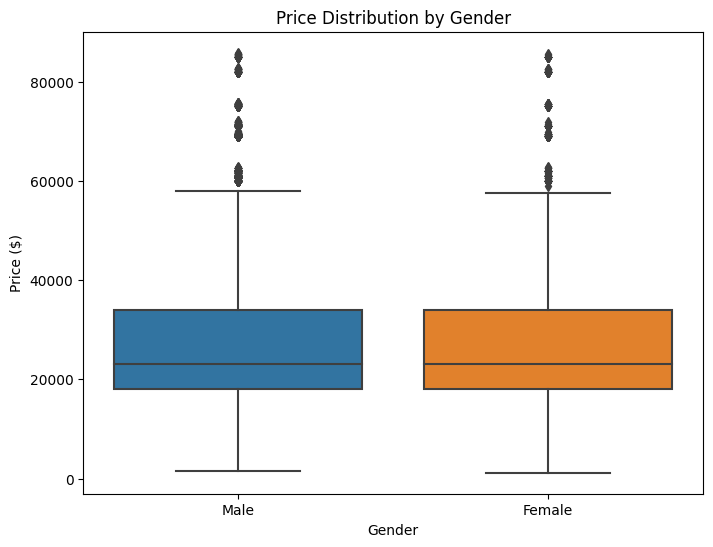

In [21]:



plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Price ($)', data=df)
plt.title('Price Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Price ($)')
plt.show()

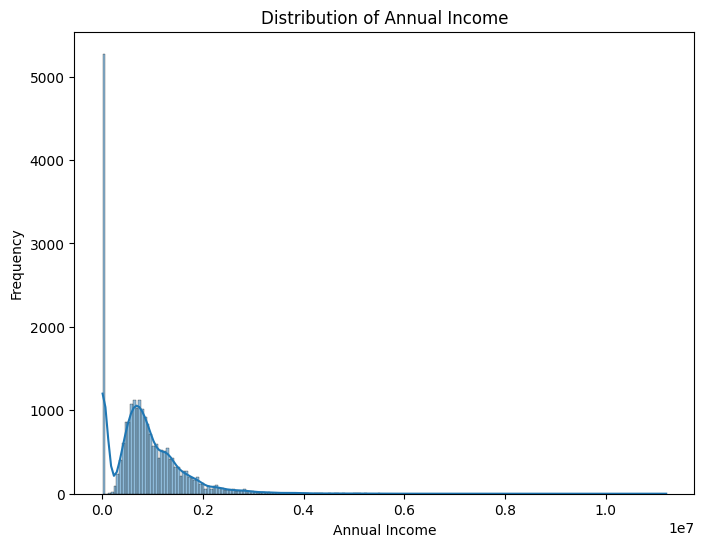

In [22]:

plt.figure(figsize=(8, 6))
sns.histplot(df['Annual Income'], kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

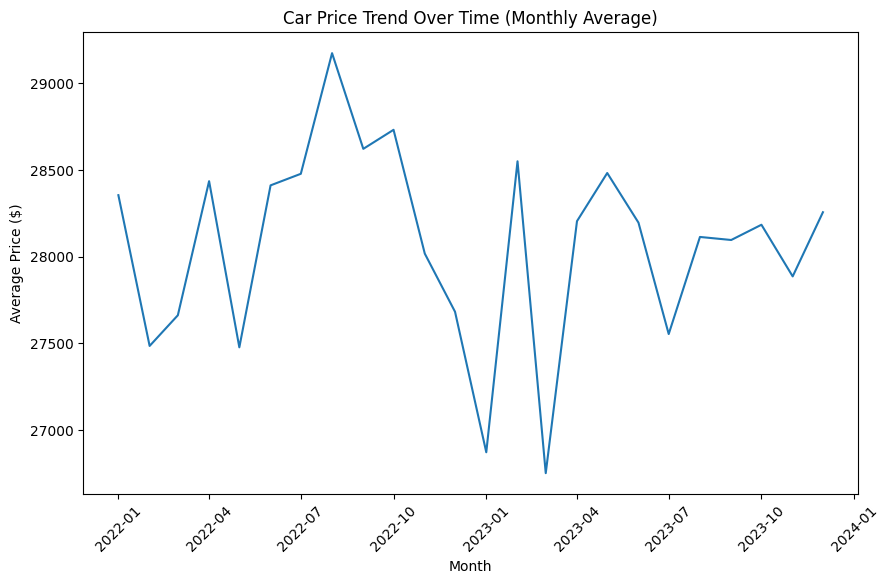

In [23]:

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
monthly_price = df.groupby('Month')['Price ($)'].mean().reset_index()
monthly_price['Month'] = monthly_price['Month'].dt.to_timestamp()


plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Price ($)', data=monthly_price)
plt.title('Car Price Trend Over Time (Monthly Average)')
plt.xlabel('Month')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()


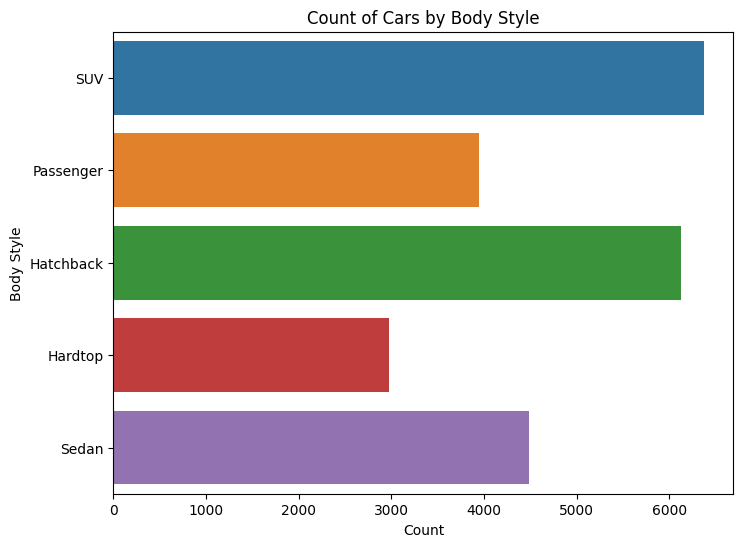

In [24]:

plt.figure(figsize=(8, 6))
sns.countplot(y='Body Style', data=df)
plt.title('Count of Cars by Body Style')
plt.xlabel('Count')
plt.ylabel('Body Style')
plt.show()

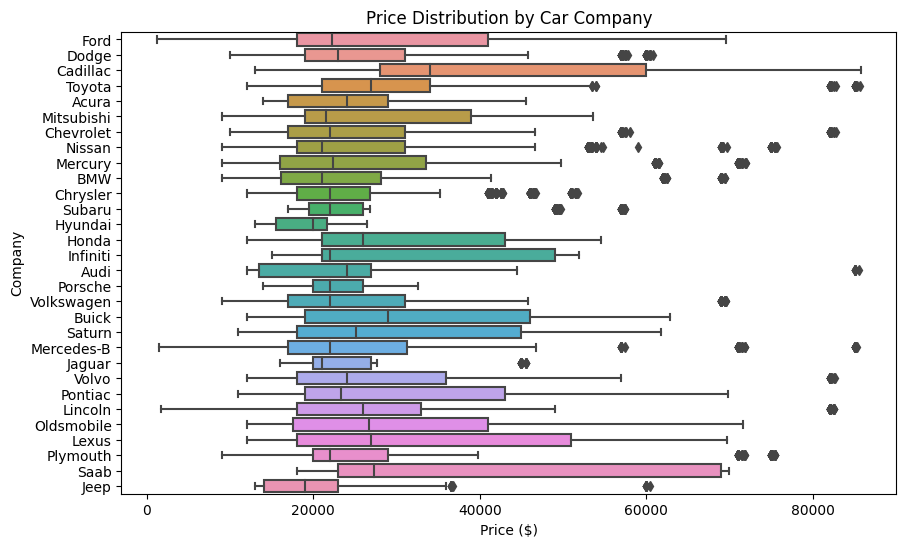

In [25]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Price ($)', y='Company', data=df)
plt.title('Price Distribution by Car Company')
plt.xlabel('Price ($)')
plt.ylabel('Company')
plt.show()

In [26]:

categorical_cols = ['Gender', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Body Style', 'Dealer_Region']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


df_encoded['Year'] = df['Date'].dt.year
df_encoded['Month'] = df['Month'].dt.month


numerical_cols = ['Car_id', 'Annual Income', 'Price ($)', 'Phone']
df_encoded[numerical_cols] = df[numerical_cols]

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Model'] = le.fit_transform(df['Model'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Company'] = le.fit_transform(df['Company'])

    

In [28]:
df.dtypes

Car_id                   object
Date             datetime64[ns]
Customer Name            object
Gender                    int64
Annual Income             int64
Dealer_Name              object
Company                   int64
Model                     int64
Engine                   object
Transmission             object
Color                    object
Price ($)                 int64
Dealer_No                object
Body Style               object
Phone                     int64
Dealer_Region            object
Month                 period[M]
dtype: object

In [29]:
df_pca = df[['Annual Income', 'Price ($)', 'Company', 'Model', 'Gender']]
df_pca.dtypes


Annual Income    int64
Price ($)        int64
Company          int64
Model            int64
Gender           int64
dtype: object

In [30]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans




pca = PCA(n_components=3)
reduced_data = pca.fit_transform(df_pca)


df_pca_reduced = pd.DataFrame(reduced_data, columns=['PC1', 'PC2', 'PC3'])


kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(df_pca_reduced)


df_pca_reduced['Cluster'] = clusters


fig = px.scatter_3d(df_pca_reduced, x='PC1', y='PC2', z='PC3', color='Cluster', opacity=0.7, size_max=5, title='3D Clustering')
fig.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor  # Importación para XGBoost
from catboost import CatBoostRegressor  # Importación para CatBoost
from lightgbm import LGBMRegressor  # Importación para LightGBM
from sklearn.neural_network import MLPRegressor  # Importación para MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv('/kaggle/input/car-sales-report/Car Sales.xlsx - car_data.csv')


models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor()),
    ('Gradient Boosting Regressor', GradientBoostingRegressor()),
    ('SVR', SVR()),
    ('XGBoost Regressor', XGBRegressor()),  # Nuevo modelo XGBoost
    ('CatBoost Regressor', CatBoostRegressor(verbose=False)),  # Nuevo modelo CatBoost
    ('LightGBM Regressor', LGBMRegressor()),  # Nuevo modelo LightGBM
    ('MLP Regressor', MLPRegressor())  # Nuevo modelo MLPRegressor
]





label_encoder = LabelEncoder()
categorical_cols = ['Gender', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Body Style', 'Dealer_Region']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


X = df[['Gender', 'Model', 'Engine', 'Transmission', 'Company', 'Color', 'Body Style', 'Dealer_Region']]


pca = PCA(n_components=3)  
X_pca = pca.fit_transform(X)



y = df['Price ($)']


X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)




for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Model: {model_name}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R-squared (R^2): {r2}')
    print('-' * 40)


Model: Linear Regression
Mean Absolute Error (MAE): 11140.03163853532
R-squared (R^2): 0.004835799757272441
----------------------------------------
Model: Ridge Regression
Mean Absolute Error (MAE): 11140.031651851055
R-squared (R^2): 0.004835796869723574
----------------------------------------
Model: Lasso Regression
Mean Absolute Error (MAE): 11140.0395557
R-squared (R^2): 0.004834048452911688
----------------------------------------
Model: Decision Tree Regressor
Mean Absolute Error (MAE): 4487.8978063397
R-squared (R^2): 0.6059803779652273
----------------------------------------
Model: Random Forest Regressor
Mean Absolute Error (MAE): 4498.515298018744
R-squared (R^2): 0.6356802481509187
----------------------------------------
Model: Gradient Boosting Regressor
Mean Absolute Error (MAE): 9429.656720421282
R-squared (R^2): 0.2730606263849702
----------------------------------------
Model: SVR
Mean Absolute Error (MAE): 10263.131467780468
R-squared (R^2): -0.10343981257640444
--

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, r2_score
import optuna
from xgboost import XGBRegressor  



pca = PCA(n_components=5)  
X_pca = pca.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 5, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1)
    min_child_weight = trial.suggest_float('min_child_weight', 1, 5)
    subsample = trial.suggest_float('subsample', 0.6, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.6, 1.0)


    model = CatBoostRegressor(
    iterations=n_estimators,  
    depth=max_depth, 
    learning_rate=learning_rate,  
    subsample=subsample, 
    colsample_bylevel=colsample_bytree,  
    random_state=42, 
    verbose=0  
    )


    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)
    return mae


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)


best_params = study.best_params
print(f"Major Hyperparameters: {best_params}")




[I 2024-01-21 07:49:15,561] A new study created in memory with name: no-name-8364c683-40ee-4a5e-9177-8deb063a97bb
[I 2024-01-21 07:49:17,587] Trial 0 finished with value: 6985.575233905841 and parameters: {'n_estimators': 350, 'max_depth': 8, 'learning_rate': 0.03404460279228502, 'min_child_weight': 2.040246923694437, 'subsample': 0.777800015362096, 'colsample_bytree': 0.8742306699622273}. Best is trial 0 with value: 6985.575233905841.
[I 2024-01-21 07:49:21,075] Trial 1 finished with value: 5465.006498357272 and parameters: {'n_estimators': 365, 'max_depth': 9, 'learning_rate': 0.06767229441086721, 'min_child_weight': 4.3547747700032, 'subsample': 0.8749459240222829, 'colsample_bytree': 0.9135298927786634}. Best is trial 1 with value: 5465.006498357272.
[I 2024-01-21 07:49:22,560] Trial 2 finished with value: 7970.984744668175 and parameters: {'n_estimators': 440, 'max_depth': 6, 'learning_rate': 0.028529868698663557, 'min_child_weight': 1.2098343949114816, 'subsample': 0.968694479685

Major Hyperparameters: {'n_estimators': 496, 'max_depth': 10, 'learning_rate': 0.09702917443824492, 'min_child_weight': 2.134947776858486, 'subsample': 0.8025758700820559, 'colsample_bytree': 0.9800429582000186}
